In [1]:
import modules.vae_nn
import modules.savefolders
import resources.sinusoidal
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

## Data Generation Sinusoidal
Creates sinusoidal data points for training. 
**To do: Add better description**

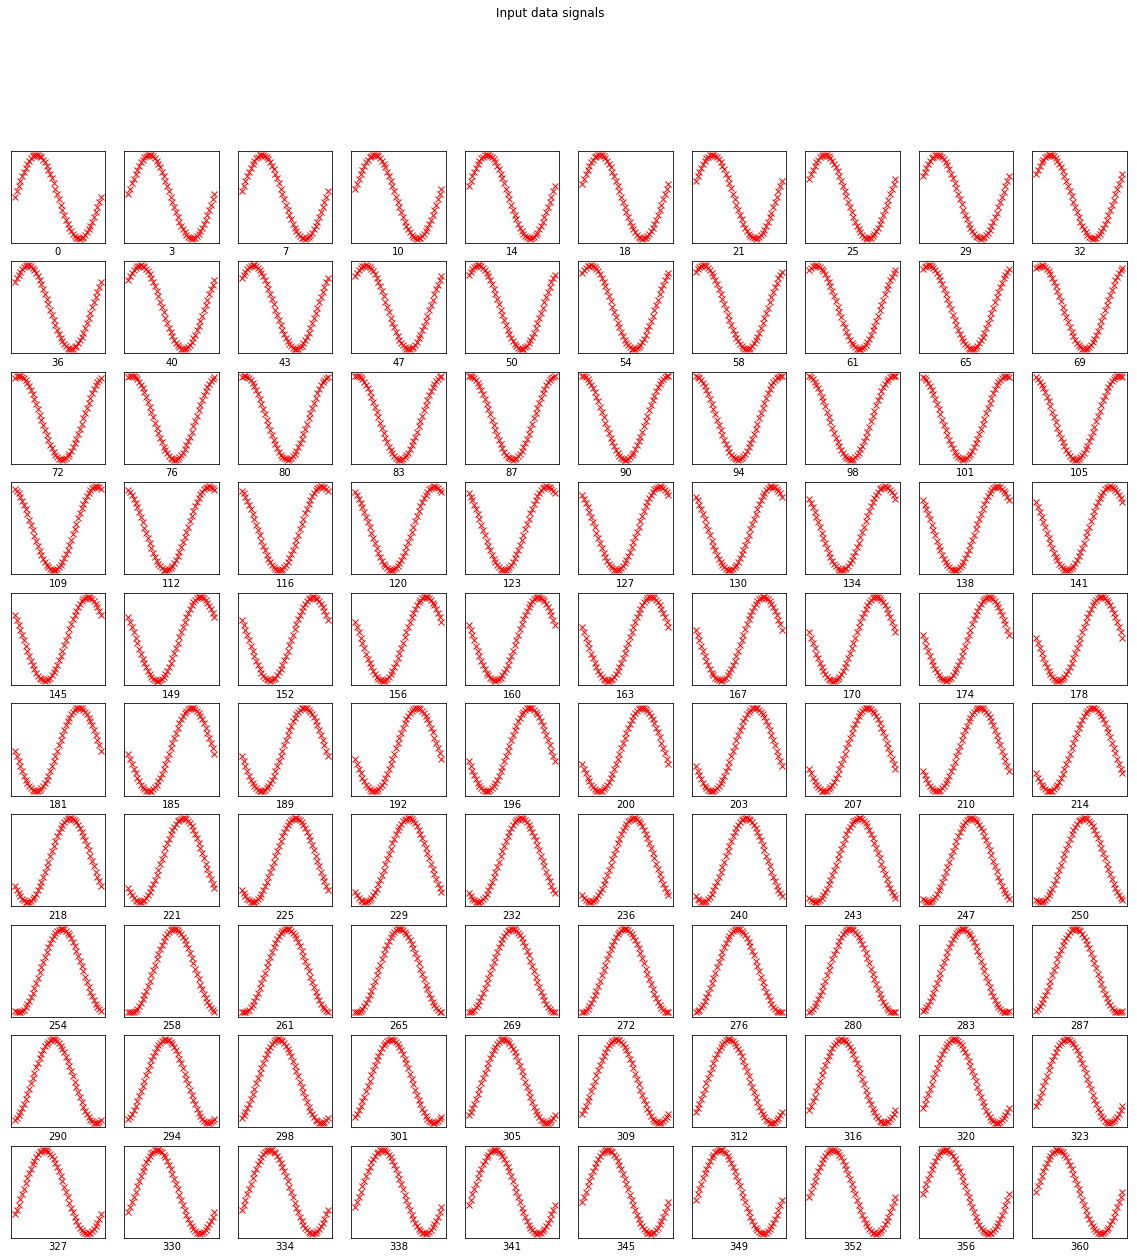

In [2]:
n_Phi = 100 # Number of data points
n_T = 50 # Dimension of sinusoidal data
omega = 2*np.pi # Angular frequency of signals
phase_range, time_range, signals = resources.sinusoidal.sinusoid_data_generation_1D(n_Phi, n_T, omega)

# PLOT THE DATA TO VISUALIZE IT ONLY FOR n_Phi = 100
fig, ax = plt.subplots(10,10)
fig.set_figheight(20)
fig.set_figwidth(20)
for num_row, row in enumerate(ax):
    for num_col, col in enumerate(row):
        col.plot(time_range, signals[np.ravel_multi_index((num_row,num_col),(10,10))],'rx')
        col.set_xticks([])
        col.set_yticks([])
        col.set_xlabel(str(int(360*phase_range[np.ravel_multi_index((num_row,num_col),(10,10))]/(2*np.pi))))
        col.grid()
plt.suptitle('Input data signals')
plt.show()


## Saving Folders
Uses the class SaveFolders which creates a root folder with three subfolders in target_folder.  Whenever a vae is trained, the weights and tensorboard logs are saved for that training. 
- **models**: this folder saves the weights for the tensors of the experiment.
- **tensorboard**: where the necessary logs for visualizing in tensorboard are stored.
- **images**: still unused but in the future I can add something to create GIF's.

The VAE weights and tensorboard logs are saved with the experiment_name, extra_comments and timestamp.

Use method get_logdir_tensorboard() to extract the address of tensorboard logs for training.
Use method get_weight_file() to extract the address of weight logs for training.

To run tensorboard in terminal:
tensorboard --logdir=%log_dir_tensorboard

In [3]:
experiment_name = 'NormalDecoder' # Code for the experiment
extra_comments ='Normal' # Extra comments of the experiment 
target_folder = "C:\\Users\\Luis Pérez\\Documents\\Master\\TUE\\Final Project\\TensorFlow Models"
folders = modules.savefolders.SaveFolders(target_folder, experiment_name, extra_comments)
log_dir_tensorboard = folders.get_logdir_tensorboard()
weights_folder = folders.get_weight_file()

Tensorboard address to copy paste:

C:\Users\LUISPR~1\DOCUME~1\Master\TUE\FINALP~1\TENSOR~1\models\NORMAL~1\TENSOR~1


## VAE Class

In [ ]:
# Instantiate the VAE class
vae_parameters = {'input_dim': 50,
                 'latent_dim':2,
                 'learning_rate':0.00001,
                 'mode':{'encoder':'Normal', 'projection':False}}
vae = modules.vae_nn.vae_nn(**vae_parameters)

[<tf.Variable 'decoder_Normal/h_dec_Normal/kernel:0' shape=(2, 16) dtype=float32_ref>, <tf.Variable 'decoder_Normal/h_dec_Normal/bias:0' shape=(16,) dtype=float32_ref>, <tf.Variable 'decoder_Normal/h_dec2_Normal/kernel:0' shape=(16, 16) dtype=float32_ref>, <tf.Variable 'decoder_Normal/h_dec2_Normal/bias:0' shape=(16,) dtype=float32_ref>, <tf.Variable 'decoder_Normal/h_dec3_Normal/kernel:0' shape=(16, 16) dtype=float32_ref>, <tf.Variable 'decoder_Normal/h_dec3_Normal/bias:0' shape=(16,) dtype=float32_ref>, <tf.Variable 'decoder_Normal/h_dec4_Normal/kernel:0' shape=(16, 16) dtype=float32_ref>, <tf.Variable 'decoder_Normal/h_dec4_Normal/bias:0' shape=(16,) dtype=float32_ref>, <tf.Variable 'decoder_Normal/x_r_Normal/kernel:0' shape=(16, 50) dtype=float32_ref>, <tf.Variable 'decoder_Normal/x_r_Normal/bias:0' shape=(50,) dtype=float32_ref>]
Normal distribution chosen as encoder


In [ ]:
# Train the VAE
vae_training_parameters = {'train_data': signals,
               'epochs': 100000,
               'log_dir_tensorboard': log_dir_tensorboard,
               'weights_folder': weights_folder,
                'batch_size': 100}

vae.train_vae(**vae_training_parameters)

Initializing parameters
Epoch 0 | Loss: 2.55E-01 | MSE: 2.54E-01 | KL: 1.44E-03
Epoch 1 | Loss: 2.55E-01 | MSE: 2.53E-01 | KL: 1.44E-03
Epoch 2 | Loss: 2.54E-01 | MSE: 2.53E-01 | KL: 1.44E-03
Epoch 3 | Loss: 2.54E-01 | MSE: 2.52E-01 | KL: 1.44E-03
Epoch 4 | Loss: 2.54E-01 | MSE: 2.53E-01 | KL: 1.44E-03
Epoch 5 | Loss: 2.54E-01 | MSE: 2.52E-01 | KL: 1.43E-03
Epoch 6 | Loss: 2.54E-01 | MSE: 2.53E-01 | KL: 1.43E-03
Epoch 7 | Loss: 2.54E-01 | MSE: 2.53E-01 | KL: 1.43E-03
Epoch 8 | Loss: 2.55E-01 | MSE: 2.54E-01 | KL: 1.43E-03
Epoch 9 | Loss: 2.53E-01 | MSE: 2.52E-01 | KL: 1.43E-03
Epoch 10 | Loss: 2.55E-01 | MSE: 2.53E-01 | KL: 1.42E-03
Epoch 11 | Loss: 2.54E-01 | MSE: 2.53E-01 | KL: 1.42E-03
Epoch 12 | Loss: 2.53E-01 | MSE: 2.51E-01 | KL: 1.42E-03
Epoch 13 | Loss: 2.54E-01 | MSE: 2.53E-01 | KL: 1.42E-03
Epoch 14 | Loss: 2.54E-01 | MSE: 2.53E-01 | KL: 1.42E-03
Epoch 15 | Loss: 2.54E-01 | MSE: 2.52E-01 | KL: 1.42E-03
Epoch 16 | Loss: 2.54E-01 | MSE: 2.53E-01 | KL: 1.41E-03
Epoch 17 | Loss: 

In [16]:
prediction = vae.encode(signals, weights_folder)
sigma = vae.encode_sigma(signals, weights_folder)

In [17]:
np.save('VAE_encoding',prediction)

In [18]:
import tensorflow as tf
tf.trainable_variables()

[<tf.Variable 'encoder_Normal/h_enc_Normal/kernel:0' shape=(50, 16) dtype=float32_ref>,
 <tf.Variable 'encoder_Normal/h_enc_Normal/bias:0' shape=(16,) dtype=float32_ref>,
 <tf.Variable 'encoder_Normal/h_enc2_Normal/kernel:0' shape=(16, 16) dtype=float32_ref>,
 <tf.Variable 'encoder_Normal/h_enc2_Normal/bias:0' shape=(16,) dtype=float32_ref>,
 <tf.Variable 'encoder_Normal/h_enc3_Normal/kernel:0' shape=(16, 16) dtype=float32_ref>,
 <tf.Variable 'encoder_Normal/h_enc3_Normal/bias:0' shape=(16,) dtype=float32_ref>,
 <tf.Variable 'encoder_Normal/mu_z_Normal/kernel:0' shape=(16, 2) dtype=float32_ref>,
 <tf.Variable 'encoder_Normal/mu_z_Normal/bias:0' shape=(2,) dtype=float32_ref>,
 <tf.Variable 'encoder_Normal/log_var_z_Normal/kernel:0' shape=(16, 2) dtype=float32_ref>,
 <tf.Variable 'encoder_Normal/log_var_z_Normal/bias:0' shape=(2,) dtype=float32_ref>,
 <tf.Variable 'decoder_Normal/h_dec_Normal/kernel:0' shape=(2, 16) dtype=float32_ref>,
 <tf.Variable 'decoder_Normal/h_dec_Normal/bias:0' s

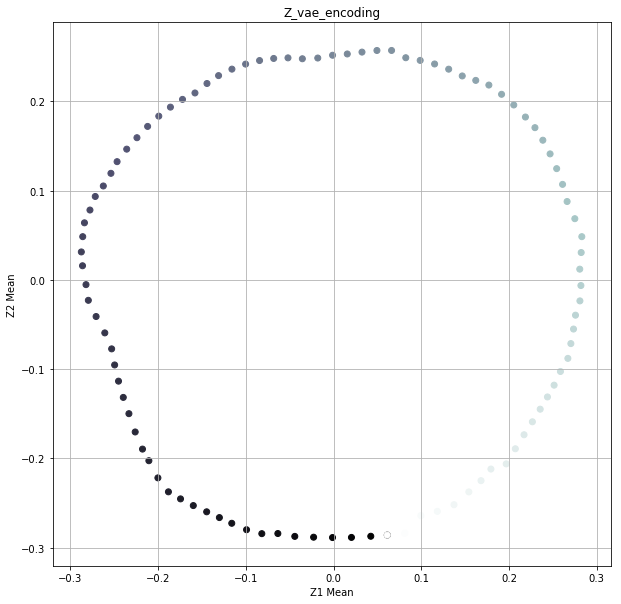

In [20]:
plt.figure(figsize=(10,10))
plt.scatter(prediction[:,0],prediction[:,1], c = np.arange(len(prediction)), cmap = cm.bone)
# plt.errorbar(prediction[:,0],prediction[:,1],xerr=sigma[:,0],yerr=sigma[:,1],fmt = 'o')
# plt.errorbar(prediction[:,0],prediction[:,1],xerr=sigma[:,0],yerr=sigma[:,1],fmt = 'o')
plt.xlabel('Z1 Mean')
plt.ylabel('Z2 Mean')
plt.title('Z_vae_encoding')
plt.grid()
plt.savefig('Z_vae_encoding_original')
plt.show()



In [ ]:
codes = np.random.normal(size = (1000,2))

In [ ]:
codes.shape

In [ ]:
plt.scatter(codes[:,0], codes[:,1])

In [ ]:
decoded_codes = vae.decode(codes, weights_folder)

In [ ]:
autoencoded = vae.autoencode(signals, weights_folder)

In [ ]:
plt.plot(time_range, decoded_codes[20])
plt.show()

**To do:**
- Use Dataset class from tensorboard to define the data in order to incorporate both shuffle and bath size.
- Add the possibility to train with heat kernel
